<a href="https://colab.research.google.com/github/ytg000629/NLP/blob/main/week4/%EC%98%81%EC%96%B4%2C%20%ED%95%9C%EA%B5%AD%EC%96%B4%20Word2Vec%20%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영어 Word2Vec 만들기

In [1]:
import nltk
nltk.download('punkt')

import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f465219eaf0>)

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [5]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


**파이썬의 gensim 패키지에는 Word2Vec을 지원하고 있음. 손쉽게 단어를 임베딩 벡터로 변환 가능!**

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [10]:
model_result = model.wv.most_similar("man")
print(model_result)
#man과 유사한 단어들

[('woman', 0.834973931312561), ('guy', 0.8143112063407898), ('boy', 0.7598742246627808), ('lady', 0.7524550557136536), ('gentleman', 0.7409050464630127), ('girl', 0.735535740852356), ('kid', 0.688174843788147), ('soldier', 0.6842153668403625), ('rabbi', 0.6793472170829773), ('king', 0.6650901436805725)]


In [12]:
model.wv['man']

array([ 0.63904595, -2.5282073 , -0.9417282 ,  0.15510517,  2.5660272 ,
       -0.25435248, -0.24852335,  0.24392448, -0.14041424,  1.2820231 ,
       -0.89383864, -1.1500002 ,  0.6526099 , -0.9136794 ,  0.47322464,
        0.16616704, -0.4356568 , -1.2098882 ,  0.5444358 , -1.4209476 ,
       -0.21817766,  0.9324358 ,  0.07745571, -0.71517944,  1.5367386 ,
        0.8232414 , -1.6917003 , -0.35081375,  0.14226155, -2.135885  ,
        0.05518165,  0.22777444,  0.44495192,  0.571638  , -1.3529795 ,
       -0.8195106 , -1.4604312 , -0.49056712, -0.2267386 ,  0.3893973 ,
        0.7751488 , -1.7303351 , -1.1519988 ,  1.5827829 ,  0.39796105,
       -1.209132  , -1.0266285 , -0.7700339 , -0.8216818 , -0.21229126,
       -1.1869918 , -2.7485409 , -0.06812733,  1.3591523 , -0.42776346,
        0.20230398, -0.4817407 , -0.288499  , -1.3423685 , -0.50995106,
       -1.0104313 ,  0.41859472,  1.3316237 ,  1.2324526 , -2.7511384 ,
        1.2850174 , -0.3164404 , -0.28195593, -1.1303757 ,  0.64

In [13]:
model.wv['man'].shape

(100,)

In [16]:
model_result = model.wv.most_similar("dog")
print(model_result)
#dog과 유사한 단어들

[('cat', 0.8054503202438354), ('chair', 0.7917346358299255), ('leg', 0.7536802291870117), ('doctor', 0.74505215883255), ('mom', 0.7360434532165527), ('seat', 0.7326037883758545), ('suit', 0.7307882905006409), ('card', 0.7218600511550903), ('friend', 0.7159297466278076), ('hat', 0.7101236581802368)]


In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model_skip = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [15]:
model_result = model_skip.wv.most_similar("man")
print(model_result)
#man과 유사한 단어들

[('woman', 0.7779598236083984), ('guy', 0.723800003528595), ('soldier', 0.7109183073043823), ('rabbi', 0.7094215750694275), ('gentleman', 0.6940749287605286), ('lady', 0.6717232465744019), ('titus', 0.6706019639968872), ('shaman', 0.6683038473129272), ('testament', 0.6633877158164978), ('waitress', 0.6632050275802612)]


In [17]:
model_result = model_skip.wv.most_similar("dog")
print(model_result)
#dog과 유사한 단어들

[('cat', 0.7580079436302185), ('puppy', 0.7550249695777893), ('chair', 0.7363768815994263), ('cigarette', 0.7268809676170349), ('hat', 0.7208067178726196), ('poker', 0.7129358649253845), ('basket', 0.7080867886543274), ('blender', 0.7025371193885803), ('blonde', 0.702404797077179), ('biking', 0.6990498900413513)]


In [11]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
#loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

# 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [18]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 48.4 MB/s eta 0:00:00


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f462c593910>)

In [21]:
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [22]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [23]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [24]:
train_data = train_data.dropna(axis=0)

In [25]:
print(len(train_data)) 

199992


In [26]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-26-d10eedfa8951>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [27]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [28]:
from tqdm.notebook import tqdm

In [29]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

  0%|          | 0/199992 [00:00<?, ?it/s]

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


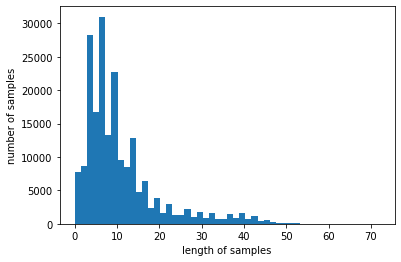

In [30]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [33]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape
#16477개의 단어. 100차원

(16477, 100)

In [34]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8494012951850891), ('안성기', 0.8350165486335754), ('유다인', 0.8303270936012268), ('주진모', 0.8159712553024292), ('채민서', 0.813380777835846), ('이정재', 0.81084144115448), ('설경구', 0.810009241104126), ('박중훈', 0.8099886775016785), ('김갑수', 0.8063153624534607), ('김남길', 0.8057748675346375)]


In [35]:
print(model.wv.most_similar("히어로"))

[('느와르', 0.8690277338027954), ('슬래셔', 0.8631410598754883), ('무협', 0.8572264909744263), ('호러', 0.8527194857597351), ('블록버스터', 0.8430177569389343), ('로코', 0.8224369883537292), ('정통', 0.8189669251441956), ('블랙', 0.8004754185676575), ('고전', 0.78211909532547), ('물의', 0.7792802453041077)]


In [36]:
from gensim.models import Word2Vec

model_skip = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

In [37]:
print(model_skip.wv.most_similar("최민식"))

[('서영희', 0.835322380065918), ('안성기', 0.8166362047195435), ('김명민', 0.8153585195541382), ('한석규', 0.8130670189857483), ('김갑수', 0.7874058485031128), ('채민서', 0.775361180305481), ('오달수', 0.7737339735031128), ('설경구', 0.7719547748565674), ('유다인', 0.771636426448822), ('오광록', 0.771634042263031)]


In [38]:
print(model_skip.wv.most_similar("히어로"))

[('첩보물', 0.8184940218925476), ('물의', 0.7916816473007202), ('슬래셔', 0.788862943649292), ('다이하드', 0.7803659439086914), ('로맨스코미디', 0.7781565189361572), ('러시아워', 0.7747837901115417), ('마블', 0.767401397228241), ('할리웃', 0.7673078179359436), ('괴수', 0.7600898146629333), ('데스티네이션', 0.759614109992981)]
